CreditCard Fraud Detection

<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
C:\Users\haroo\AppData\Local\Temp\ipykernel_3764\1597067219.py:11: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv(F"C:\creditcard.csv\creditcard.csv")


Dataset loaded successfully

=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  floa

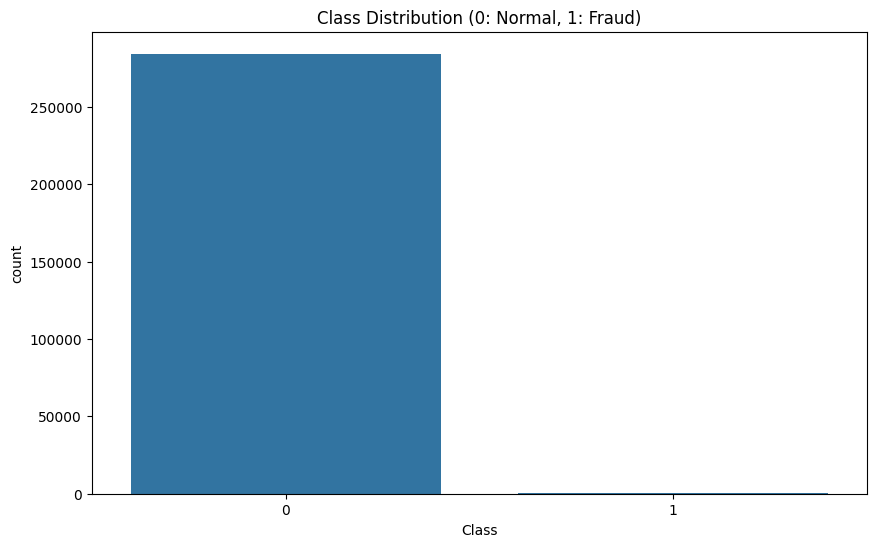

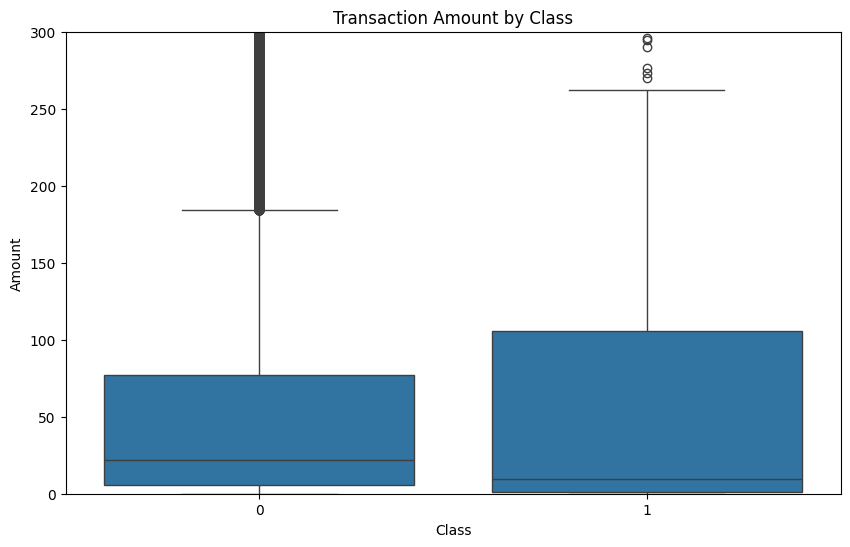

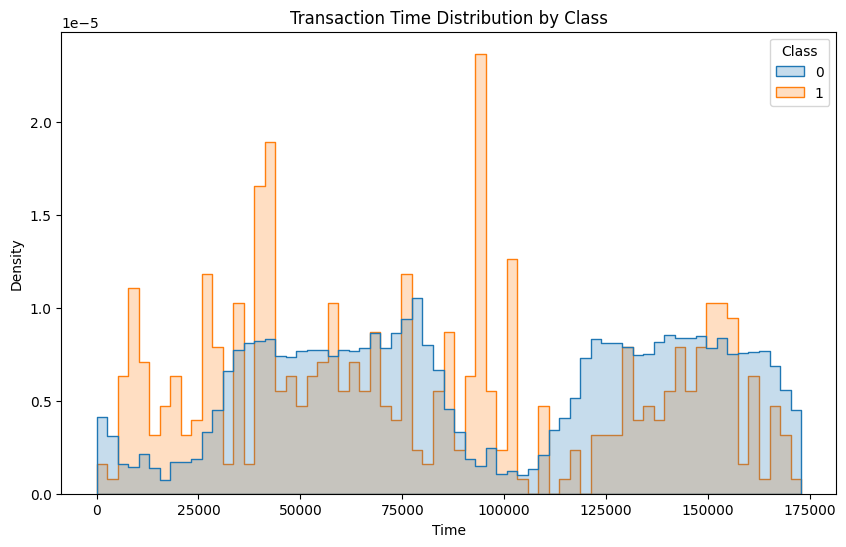

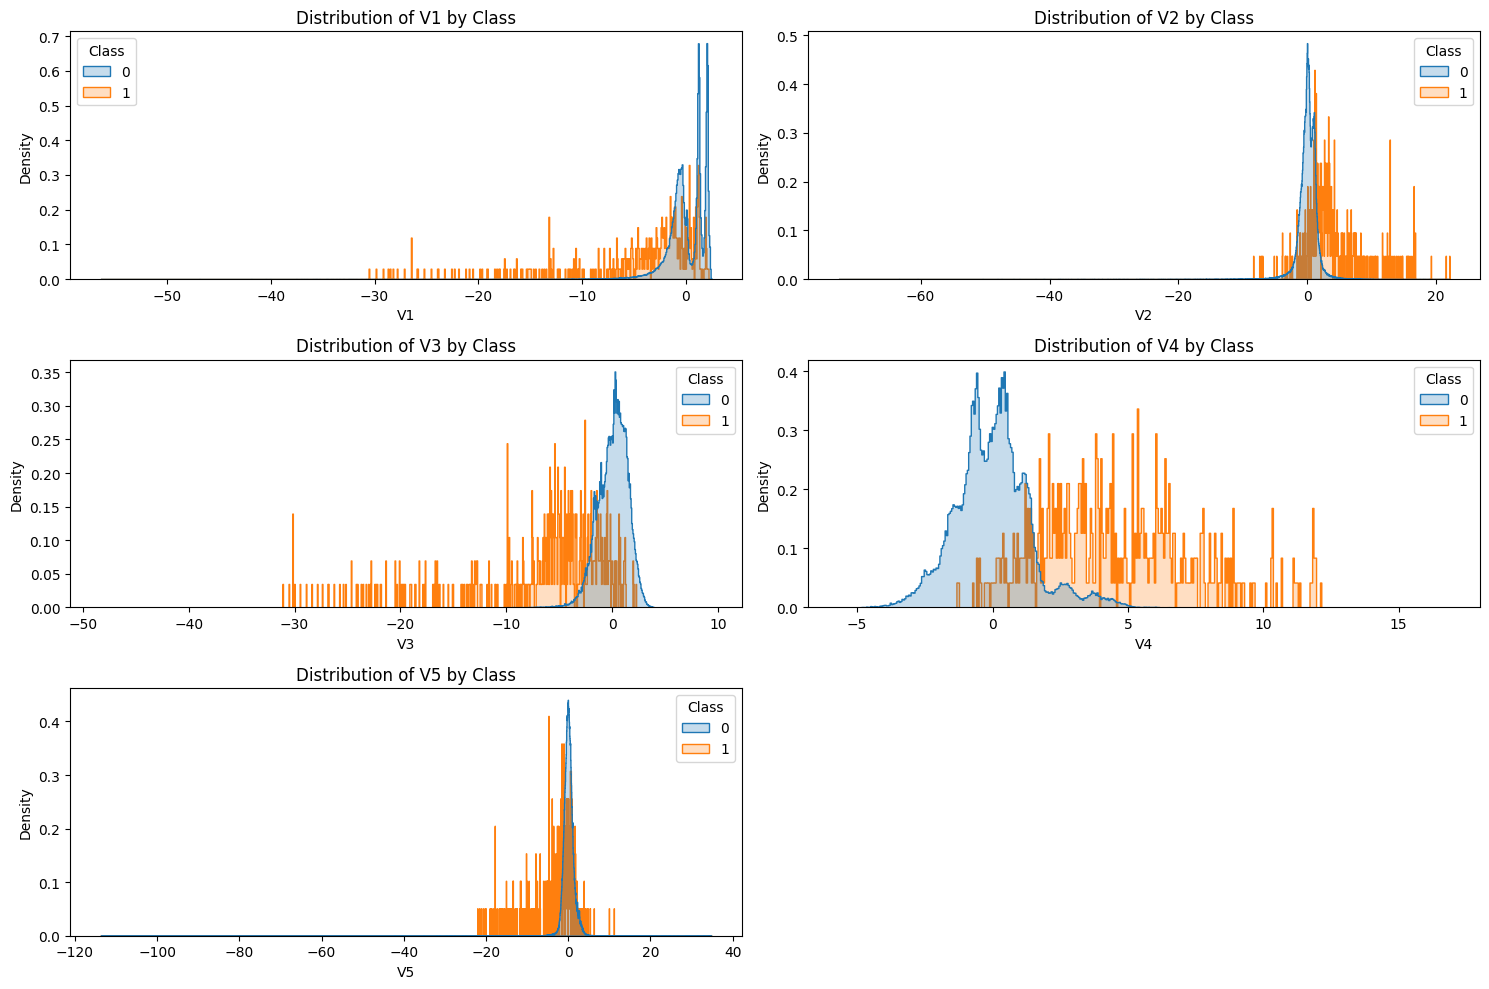


=== Scaled Features (Sample) ===
            Time    Amount
56328  -0.999806 -0.275911
204460  0.851112 -0.316084
266302  1.419159 -0.332145
89510  -0.679152 -0.148065
40763  -1.146860  0.978521

=== Class Imbalance ===
Train set:
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64

=== After Manual Undersampling ===
Class
1    294
0    294
Name: count, dtype: int64

=== Final Preprocessed Data Summary ===
Original dataset shape: (284807, 31)
Train set shape: (170883, 30)
Validation set shape: (56961, 30)
Test set shape: (56963, 30)

=== Class Distributions ===
Original:
Class
0    284315
1       492
Name: count, dtype: int64

Train:
Class
0    170589
1       294
Name: count, dtype: int64

Validation:
Class
0    56863
1       98
Name: count, dtype: int64

Test:
Class
0    56863
1      100
Name: count, dtype: int64


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
try:
    df = pd.read_csv(F"C:\creditcard.csv\creditcard.csv")
    print("Dataset loaded successfully")
except FileNotFoundError:
    print("Please download the dataset from Kaggle first")
    print("https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud")

# Initial Data Examination
print("\n=== Dataset Information ===")
print(df.info())

print("\n=== First 5 Rows ===")
print(df.head())

print("\n=== Missing Values ===")
print(df.isnull().sum())

print("\n=== Class Distribution ===")
print(df['Class'].value_counts())
print(f"Fraud percentage: {df['Class'].value_counts()[1]/len(df)*100:.2f}%")

# Data Splitting - Modified to ensure at least 100 fraud cases in test set
X = df.drop('Class', axis=1)
y = df['Class']

# First, extract all fraud cases
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

# Split fraud cases: 100 for test, rest for train/val
fraud_test = fraud.sample(n=100, random_state=42)
fraud_train_val = fraud.drop(fraud_test.index)

# Split normal cases: 20% for test, 80% for train/val
normal_test = normal.sample(frac=0.2, random_state=42)
normal_train_val = normal.drop(normal_test.index)

# Combine to create final splits
X_test = pd.concat([fraud_test.drop('Class', axis=1), normal_test.drop('Class', axis=1)])
y_test = pd.concat([fraud_test['Class'], normal_test['Class']])

X_train_val = pd.concat([fraud_train_val.drop('Class', axis=1), normal_train_val.drop('Class', axis=1)])
y_train_val = pd.concat([fraud_train_val['Class'], normal_train_val['Class']])

# Split train_val into train and validation (75%/25%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42
)

# Verify splits
print("\n=== Test Set Class Distribution ===")
print(y_test.value_counts())
print(f"Test set has {y_test.sum()} fraud cases")

print("\n=== Final Split Sizes ===")
print(f"Train set: {len(X_train)} samples ({y_train.sum()} fraud)")
print(f"Validation set: {len(X_val)} samples ({y_val.sum()} fraud)")
print(f"Test set: {len(X_test)} samples ({y_test.sum()} fraud)")

# Data Analysis and Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x=y)
plt.title('Class Distribution (0: Normal, 1: Fraud)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.ylim(0, 300)
plt.title('Transaction Amount by Class')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Time', hue='Class', element='step', stat='density', common_norm=False)
plt.title('Transaction Time Distribution by Class')
plt.show()

plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(3, 2, i+1)
    sns.histplot(data=df, x=f'V{i+1}', hue='Class', element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of V{i+1} by Class')
plt.tight_layout()
plt.show()

# Data Preprocessing
scaler = StandardScaler()

# Scale Time and Amount in all splits
for dataset in [X_train, X_val, X_test]:
    dataset[['Time', 'Amount']] = scaler.fit_transform(dataset[['Time', 'Amount']])

print("\n=== Scaled Features (Sample) ===")
print(X_train[['Time', 'Amount']].head())

print("\n=== Class Imbalance ===")
print("Train set:")
print(y_train.value_counts(normalize=True))

# Manual undersampling
fraud_indices = y_train[y_train == 1].index
normal_indices = y_train[y_train == 0].index
n_normal = len(fraud_indices)  # Match number of normal to fraud cases
undersampled_normal_indices = np.random.choice(normal_indices, n_normal, replace=False)
undersampled_indices = np.concatenate([fraud_indices, undersampled_normal_indices])
X_train_under = X_train.loc[undersampled_indices]
y_train_under = y_train.loc[undersampled_indices]

print("\n=== After Manual Undersampling ===")
print(y_train_under.value_counts())

# Final Data Summary
print("\n=== Final Preprocessed Data Summary ===")
print(f"Original dataset shape: {df.shape}")
print(f"Train set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

print("\n=== Class Distributions ===")
print("Original:")
print(df['Class'].value_counts())
print("\nTrain:")
print(y_train.value_counts())
print("\nValidation:")
print(y_val.value_counts())
print("\nTest:")
print(y_test.value_counts())